# A Comparative Analysis of Heart Failure Prediction Models: K-Nearest Neighbors, Logistic Regression, and Naive Bayes

In [1]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#loading the DataSet
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Performing OneHot-Encoding for Categorical Values

In [7]:
#unique values of sex
print(df['Sex'].unique())
print('\n',df['Sex'].value_counts())

['M' 'F']

 Sex
M    725
F    193
Name: count, dtype: int64


In [8]:
#unique values of ChestPainType
print(df['ChestPainType'].unique())
print('\n',df['ChestPainType'].value_counts())

['ATA' 'NAP' 'ASY' 'TA']

 ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [9]:
#unique values of FastingBS
print(df['FastingBS'].unique())
print('\n',df['FastingBS'].value_counts())

[0 1]

 FastingBS
0    704
1    214
Name: count, dtype: int64


In [10]:
#unique values of RestingECG
print(df['RestingECG'].unique())
print('\n',df['RestingECG'].value_counts())

['Normal' 'ST' 'LVH']

 RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [11]:
#unique values of ExerciseAngina
print(df['ExerciseAngina'].unique())
print('\n',df['ExerciseAngina'].value_counts())

['N' 'Y']

 ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


In [12]:
#unique values of ST_Slope
print(df['ST_Slope'].unique())
print('\n',df['ST_Slope'].value_counts())

['Up' 'Flat' 'Down']

 ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
# df['Sex']=df['Sex'].map({'M':0,'F':1})
encoded_df=pd.get_dummies(df,columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']).astype(int)
encoded_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [15]:
encoded_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [17]:
X = encoded_df.drop(columns=['HeartDisease'])
y = encoded_df['HeartDisease']

In [18]:
X

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0


In [19]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Normalizing the values and Scalling

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[-1.4331398 ,  0.41090889,  0.82507026,  1.38292822, -0.72759199,
        -0.51595242,  0.51595242, -1.08413811,  2.07517671, -0.53283777,
        -0.22967867,  0.55134134, -0.55134134, -0.50747832,  0.81427482,
        -0.49044933,  0.8235563 , -0.8235563 , -0.27144836, -1.00218103,
         1.15067399],
       [-0.47848359,  1.49175234, -0.17196105,  0.75415714,  0.28289129,
         1.93816322, -1.93816322, -1.08413811, -0.48188667,  1.87674385,
        -0.22967867,  0.55134134, -0.55134134, -0.50747832,  0.81427482,
        -0.49044933,  0.8235563 , -0.8235563 , -0.27144836,  0.99782372,
        -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , -1.52513802, -0.72759199,
        -0.51595242,  0.51595242, -1.08413811,  2.07517671, -0.53283777,
        -0.22967867,  0.55134134, -0.55134134, -0.50747832, -1.22808661,
         2.03894663,  0.8235563 , -0.8235563 , -0.27144836, -1.00218103,
         1.15067399],
       [-0.5845565 ,  0.30282455,  0.13903954, -1.13215609

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [22]:
X_train.shape

(734, 21)

In [23]:
y_train.shape

(734,)

In [24]:
X_test.shape

(184, 21)

In [25]:
y_test.shape

(184,)

### model training

In [26]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(C=1000.0,random_state=0)

In [27]:
Classifier.fit(X_train,y_train)

LogisticRegression(C=1000.0, random_state=0)

### model eval

In [28]:
from sklearn.metrics import accuracy_score
pred = Classifier.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test,pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8532608695652174


### HyperParamps Tuning

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [30]:
log_reg = LogisticRegression()

# Define the parameter grid
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter_values = [100, 1000, 2500, 5000]
grid = dict(solver=solvers, penalty=penalty, C=c_values, max_iter=max_iter_values)

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [31]:
clf = GridSearchCV(log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)


In [32]:
best_clf = clf.fit(X,y)

In [33]:
best_clf.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [34]:
print (f'Accuracy after tuning : {best_clf.score(X,y):.3f}')

Accuracy after tuning : 0.871


### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

cvScore = cross_val_score(log_reg,X_train,y_train,cv=5)
print("Cross-Validation Scores:", cvScore)
print("Mean CV Score:", cvScore.mean())

Cross-Validation Scores: [0.87755102 0.88435374 0.85714286 0.82993197 0.8630137 ]
Mean CV Score: 0.8623986580933745


### confusion Matrix

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

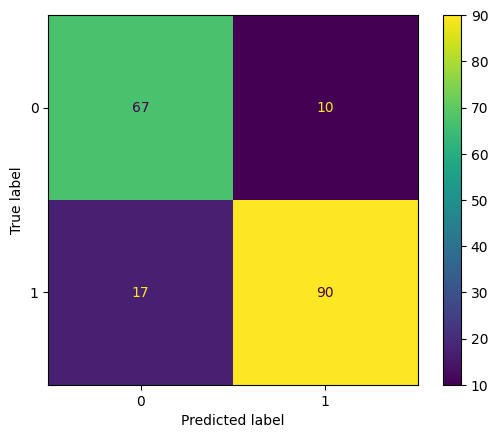

In [39]:

classes = np.unique(np.concatenate((y_test, pred)))

cm = confusion_matrix(y_test, pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()


### ROC Curve

In [40]:
# predict probabilities
pred_prob1 = Classifier.predict_proba(X_test)

In [41]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [42]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [43]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

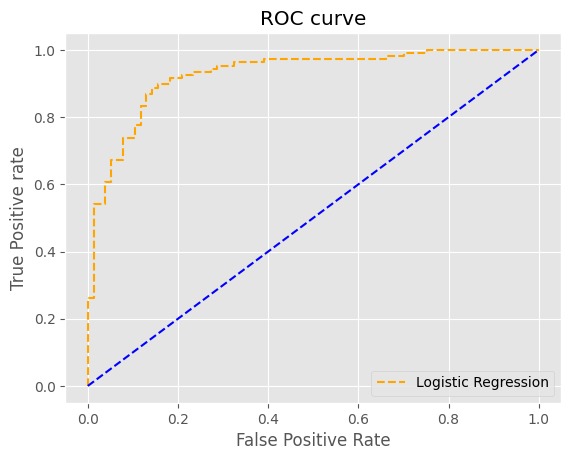

In [44]:
plt.style.use('ggplot')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC.png', dpi=300)
plt.show()


### AUC Score

In [45]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

In [46]:
print(auc_score1)

0.926690132297609


## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
k = 5
KNN = KNeighborsClassifier(n_neighbors=k)

In [49]:
KNN.fit(X_train,y_train)
yhat = KNN.predict(X_test)

In [50]:
print('Accuracy Score: ',accuracy_score(y_test,yhat))

Accuracy Score:  0.8532608695652174


### Model Eval

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



### Hyper Paramps Tunning

In [53]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [54]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [55]:
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [56]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [57]:
#Fit the model
best_model = clf.fit(X,y)

In [58]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 27


In [59]:
k3 = KNeighborsClassifier(leaf_size=1,p=1,n_neighbors=27)

In [60]:
k3.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=27, p=1)

In [61]:
predictions = k3.predict(X_test)

# Evaluate the model performance
accuracy = k3.score(X_test, y_test) 

In [62]:
accuracy

0.875

### Plotting

In [63]:
cm = confusion_matrix(y_test,yhat,labels = KNN.classes_)

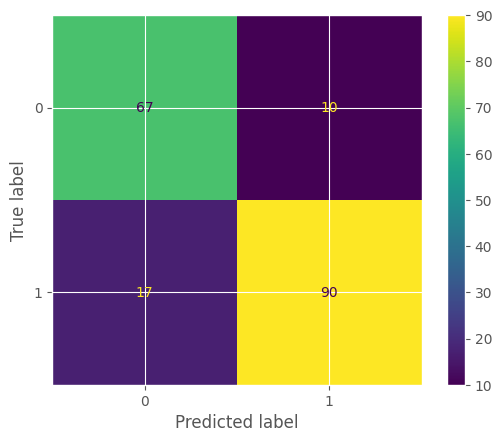

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot()

### ROC Curve

In [65]:
# predict probabilities
pred_prob2 = KNN.predict_proba(X_test)

In [66]:
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [67]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

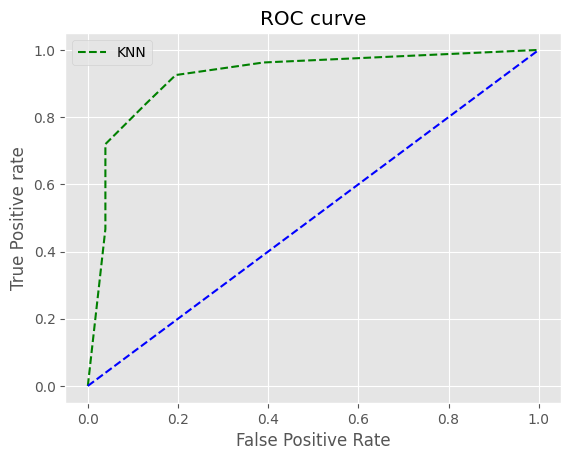

In [68]:
plt.style.use('ggplot')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC.png', dpi=300)
plt.show()


### AUC Score

In [69]:
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score2

0.9202573127806772

## Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred  =  classifier.predict(X_test)


In [72]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

### Model Eval

In [73]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8641304347826086


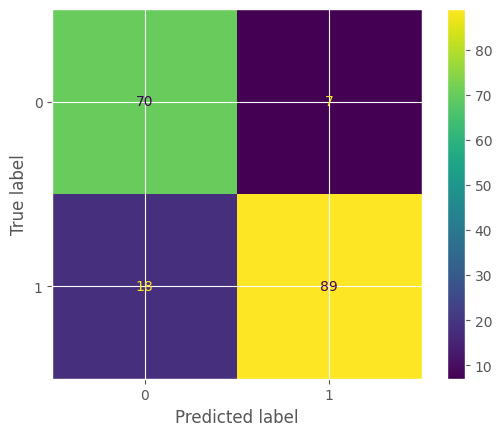

In [74]:
cm = confusion_matrix(y_test,y_pred,labels = classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Hyper paramps Tunning


In [75]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [76]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.12328467394420659)


In [77]:
y_pred = nbModel_grid.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

0.8641304347826086 : is the accuracy score


In [79]:
accuracy

0.8641304347826086

## ROC Curve

In [80]:
# predict probabilities
pred_prob3 = classifier.predict_proba(X_test)

In [81]:
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

In [82]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

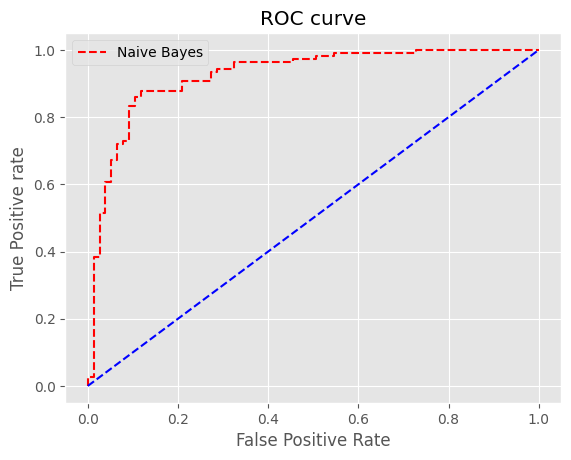

In [83]:
plt.style.use('ggplot')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--', color='red', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC.png', dpi=300)
plt.show()


### AUC Score

In [84]:
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score3

0.9236557834688677

### Combined ROC

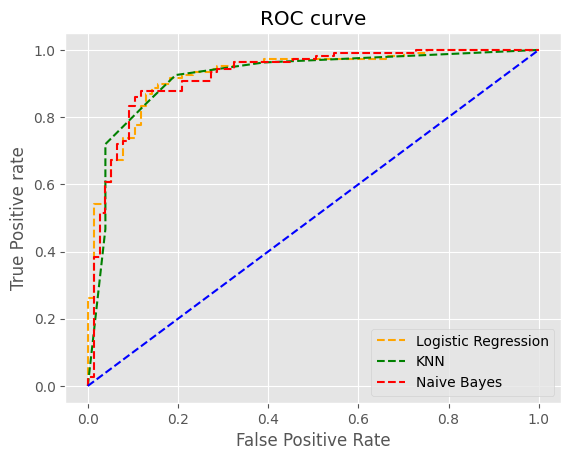

In [85]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# plot roc curves for Logistic Regression
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
# plot roc curves for KNN
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
# plot roc curves for Naive Bayes
plt.plot(fpr3, tpr3, linestyle='--', color='red', label='Naive Bayes')

# plot the baseline (random) ROC curve
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC.png', dpi=300)
plt.show()
